In [1]:
import json
from pprint import pprint
from matplotlib import pyplot as plt
import seaborn as sns
import networkx as nx
import pandas as pd
import itertools as iter
import re

### Reading episode 1 interactions file 
#### interactions show the total characters in the episode as well as the number of times each of those characters interact in any scene mutually

In [2]:
!pwd

/Users/Vaibhav_Beohar/Documents/VB_Mck_Docs/MIDS/W209/final_proj/w209-spring2022-final-proj/EDA/src


In [3]:
characters = pd.read_csv('../star-wars-network-data-master/characters.csv', header=0)
characters = list(characters['characters'])

In [33]:
characters

['ANAKIN',
 'DARTH VADER',
 'LUKE',
 'OBI-WAN',
 'C-3PO',
 'R2-D2',
 'CHEWBACCA',
 'HAN',
 'LEIA',
 'PADME',
 'QUI-GON',
 'EMPEROR',
 'YODA',
 'JAR JAR',
 'LANDO',
 'RED LEADER',
 'WEDGE',
 'BAIL ORGANA',
 'CAPTAIN PANAKA',
 'MACE WINDU',
 'NUTE GUNRAY',
 'BIGGS',
 'GOLD LEADER',
 'GENERAL GRIEVOUS',
 'TARKIN',
 'PIETT',
 'FODE/BEED',
 'RIC OLIE',
 'SHMI',
 'RUNE',
 'BOBA FETT',
 'OWEN',
 'ADMIRAL ACKBAR',
 'WATTO',
 'LAMA SU',
 'COUNT DOOKU',
 'GOLD FIVE',
 'RED TEN',
 'SIO BIBBLE',
 'JABBA',
 'MAD MADDA',
 'TAUN WE',
 'RIEEKAN',
 'CAPTAIN TYPHO',
 'ZEV',
 'DARTH MAUL',
 'BRAVO TWO',
 'JANGO FETT',
 'BOSS NASS',
 'GENERAL CEEL',
 'TEY HOW',
 'TC-14',
 'KITSTER',
 'RUWEE',
 'CLONE COMMANDER CODY',
 'CLONE COMMANDER GREE',
 'KI-ADI-MUNDI',
 'ODD BALL',
 'MON MOTHMA',
 'BERU',
 'DACK',
 'JANSON',
 'SEBULBA',
 'JIRA',
 'VALORUM',
 'WALD',
 'BRAVO THREE',
 'DOFINE',
 'TARPALS',
 'PK-4',
 'GREEDO',
 'CLIEGG',
 'SENATOR ASK AAK',
 'JOBAL',
 'ORN FREE TAA',
 'POGGLE',
 'SOLA',
 'SUN RIT',
 'P

In [36]:
episode1 = {}
episode1_links = []
episode1_nodes = []
with open('../star-wars-network-data-master/starwars-episode-1-interactions.json') as f:
	data = json.load(f)
	for e in data['nodes']:
		node_dict = {}
		node_dict['episode'] = '1'
		node_dict['name'] = characters.index(e['name'])
		node_dict['value'] = e['value']
		node_dict['colour'] = e['colour']
		episode1_nodes.append(node_dict)

episode1_nodes

[{'episode': '1', 'name': 10, 'value': 60, 'colour': '#4f4fb1'},
 {'episode': '1', 'name': 20, 'value': 18, 'colour': '#808080'},
 {'episode': '1', 'name': 69, 'value': 2, 'colour': '#808080'},
 {'episode': '1', 'name': 51, 'value': 4, 'colour': '#808080'},
 {'episode': '1', 'name': 3, 'value': 33, 'colour': '#48D1CC'},
 {'episode': '1', 'name': 67, 'value': 3, 'colour': '#808080'},
 {'episode': '1', 'name': 29, 'value': 10, 'colour': '#808080'},
 {'episode': '1', 'name': 50, 'value': 4, 'colour': '#808080'},
 {'episode': '1', 'name': 11, 'value': 13, 'colour': '#191970'},
 {'episode': '1', 'name': 18, 'value': 19, 'colour': '#808080'},
 {'episode': '1', 'name': 38, 'value': 7, 'colour': '#808080'},
 {'episode': '1', 'name': 13, 'value': 35, 'colour': '#9a9a00'},
 {'episode': '1', 'name': 68, 'value': 3, 'colour': '#808080'},
 {'episode': '1', 'name': 48, 'value': 4, 'colour': '#808080'},
 {'episode': '1', 'name': 9, 'value': 30, 'colour': '#DDA0DD'},
 {'episode': '1', 'name': 27, 'val

In [9]:
sw_num_episodes = 8
for i in range(1,sw_num_episodes):
    episode = {}
    episode_links = []
    episode_nodes = []
    with open(f'../star-wars-network-data-master/starwars-episode-{i}-interactions.json') as f:
        data = json.load(f)
        for e in data['links']:
            link_dict = {}
            link_dict['group'] = '1'
            link_dict['source'] = re.sub('\s+', '_', data['nodes'][e['source']]['name'])
            link_dict['target'] = re.sub('\s+', '_', data['nodes'][e['target']]['name'])
            link_dict['value'] = e['value']
            # data.update(e)
            episode_links.append(link_dict)
        for e in data['nodes']:
            node_dict = {}
            node_dict['group'] = '1'
            node_dict['id'] = re.sub('\s+', '_', e['name'])
            node_dict['value'] = e['value']
            node_dict['colour'] = e['colour']
            episode_nodes.append(node_dict)

    episode['nodes'] = episode_nodes
    episode['links'] = episode_links

    with open(f'../star-wars-network-data-master/starwars-episode-{i}-interactions_updated.json', 'w', encoding='utf-8') as f:
        # f.write(json.dumps(episode, ensure_ascii=False))
        json.dump(episode, f, indent=4)

# pprint(data)
# pprint(episode1)

In [26]:
episode12 = {}
episode12_nodes = []
episode12_links = []
with open(f'../star-wars-network-data-master/starwars-episode-1-interactions_updated.json') as f1:
	data1 = json.load(f1)
	episode12_nodes = data1['nodes']
	episode12_links = [] #data1['links']
	episode1_ids = [row['id'] for row in data1['nodes']]
	# episode1_links = [row['source']+row['target']+str(row['value']) for row in data1['links']]
	with open(f'../star-wars-network-data-master/starwars-episode-2-interactions_updated.json') as f2:
		data2 = json.load(f2)
		for node in data2['nodes']:
			if node['id'] not in episode1_ids:
				node_dict = {}
				node_dict['group'] = '2'
				node_dict['id'] = node['id']
				node_dict['value'] = node['value']
				node_dict['colour'] = node['colour']
				episode12_nodes.append(node_dict)
		episode12_links = data2['links']		
		# for link in data2['links']:
		# 	if link['source']+link['target']+str(link['value']) not in episode1_links:
		# 		link_dict = {}
		# 		link_dict['group'] = '2'
		# 		link_dict['source'] = link['source']
		# 		link_dict['target'] = link['target']
		# 		link_dict['value'] = link['value']
		# 		episode12_links.append(link_dict)
	episode12['nodes'] = episode12_nodes
	episode12['links'] = episode12_links
	with open(f'../star-wars-network-data-master/starwars-episode-12-interactions_updated.json', 'w', encoding='utf-8') as f:
		json.dump(episode12, f, indent=4)



In [ ]:
episode123 = {}
episode123_nodes = []
episode123_links = []
with open(f'../star-wars-network-data-master/starwars-episode-12-interactions_updated.json') as f12:
	data12 = json.load(f12)
	episode123_nodes = data12['nodes']
	episode123_links = []
	episode12_ids = [row['id'] for row in data12['nodes']]
	with open(f'../star-wars-network-data-master/starwars-episode-3-interactions_updated.json') as f3:
		data3 = json.load(f3)
		for node in data3['nodes']:
			if node['id'] not in episode12_ids: # check if epi_3 nodes not already present in episodes 1&2
				node_dict = {}
				node_dict['group'] = '3'
				node_dict['id'] = node['id']
				node_dict['value'] = node['value']
				node_dict['colour'] = node['colour']
				episode123_nodes.append(node_dict)
		episode123_links = data3['links']		
		# for link in data2['links']:
		# 	if link['source']+link['target']+str(link['value']) not in episode1_links:
		# 		link_dict = {}
		# 		link_dict['group'] = '2'
		# 		link_dict['source'] = link['source']
		# 		link_dict['target'] = link['target']
		# 		link_dict['value'] = link['value']
		# 		episode12_links.append(link_dict)
	episode123['nodes'] = episode123_nodes
	episode123['links'] = episode123_links
	with open(f'../star-wars-network-data-master/starwars-episode-123-interactions_updated.json', 'w', encoding='utf-8') as f:
		json.dump(episode123, f, indent=4)



In [60]:
with open('../star-wars-network-data-master/starwars-episode-1-interactions_updated.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(episode1, ensure_ascii=False))

In [4]:
with open('../star-wars-network-data-master/starwars-episode-1-mentions.json') as f:
    mdata = json.load(f)

pprint(mdata)

{'links': [{'source': 0, 'target': 1, 'value': 3},
           {'source': 3, 'target': 2, 'value': 1},
           {'source': 4, 'target': 1, 'value': 46},
           {'source': 4, 'target': 5, 'value': 7},
           {'source': 4, 'target': 2, 'value': 1},
           {'source': 1, 'target': 5, 'value': 6},
           {'source': 1, 'target': 2, 'value': 1},
           {'source': 2, 'target': 5, 'value': 1},
           {'source': 0, 'target': 2, 'value': 2},
           {'source': 6, 'target': 0, 'value': 1},
           {'source': 6, 'target': 2, 'value': 1},
           {'source': 0, 'target': 7, 'value': 16},
           {'source': 0, 'target': 4, 'value': 2},
           {'source': 4, 'target': 7, 'value': 2},
           {'source': 1, 'target': 7, 'value': 2},
           {'source': 0, 'target': 8, 'value': 2},
           {'source': 7, 'target': 8, 'value': 2},
           {'source': 4, 'target': 9, 'value': 2},
           {'source': 1, 'target': 9, 'value': 2},
           {'source': 0, 'tar

In [5]:
df_links = pd.DataFrame(data['links'])
df_nodes = pd.DataFrame(data['nodes'])

In [6]:
mdf_links = pd.DataFrame(mdata['links'])
mdf_nodes = pd.DataFrame(mdata['nodes'])

In [7]:
df_links

,source,target,value
0,1,0,1
1,2,3,1
2,4,3,1
3,0,3,1
4,4,0,26
...,...,...,...
124,5,7,1
125,36,35,2
126,36,15,2
127,17,36,1


In [8]:
df_nodes

,name,value,colour
0,QUI-GON,60,#4f4fb1
1,NUTE GUNRAY,18,#808080
2,PK-4,2,#808080
3,TC-14,4,#808080
4,OBI-WAN,33,#48D1CC
5,DOFINE,3,#808080
6,RUNE,10,#808080
7,TEY HOW,4,#808080
8,EMPEROR,13,#191970
9,CAPTAIN PANAKA,19,#808080


In [10]:
df_links.to_csv('sw_episode1_links.csv')
df_links.to_csv('sw_episode1_nodes.csv')

In [16]:
mdf_links.to_csv('sw_mentions_episode1_links.csv')
mdf_links.to_csv('sw_mentions_episode1_nodes.csv')

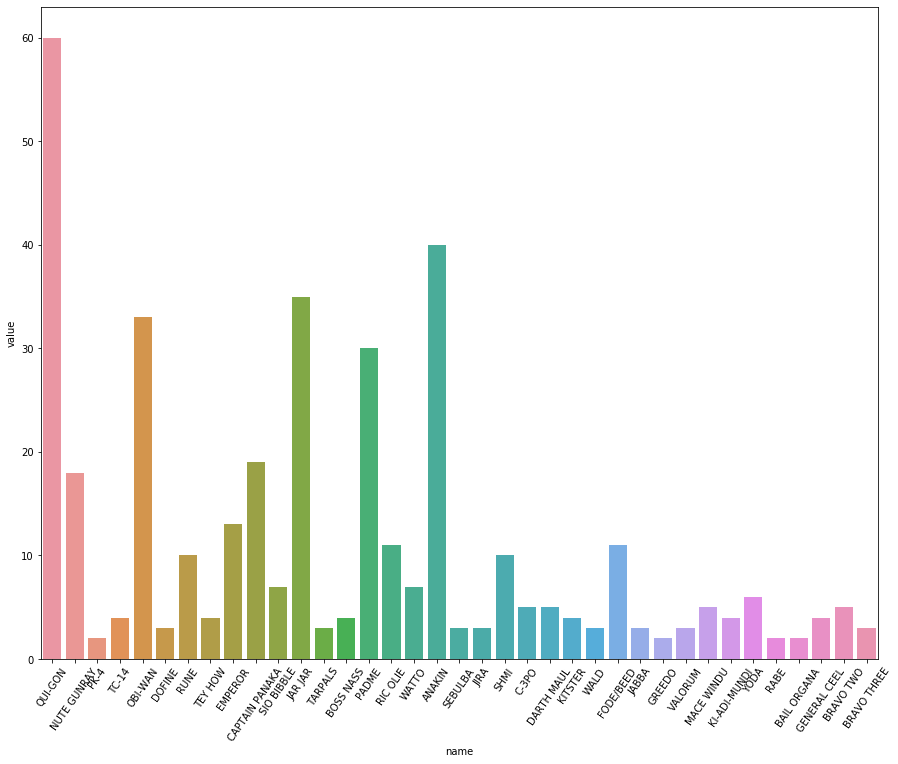

In [9]:
# sns.set_theme(style="whitegrid")
fig = plt.figure(figsize = (15, 12))
ax = sns.barplot(x='name', y='value', data=df_nodes)
ax.tick_params(axis='x', rotation=55)

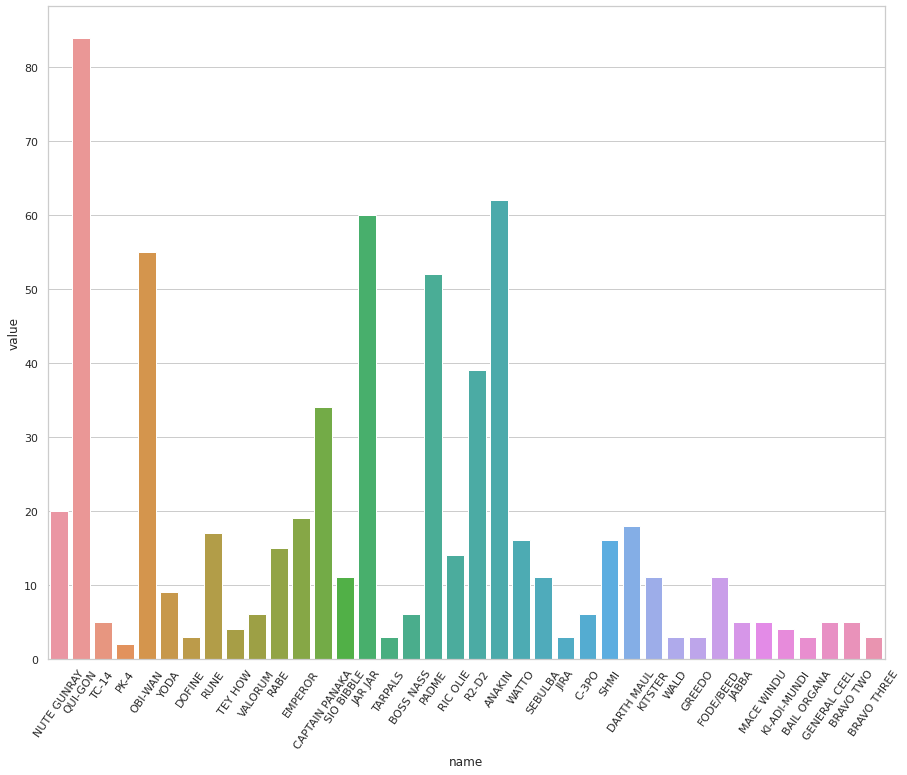

In [18]:
sns.set_theme(style="whitegrid")
fig = plt.figure(figsize = (15, 12))
ax = sns.barplot(x='name', y='value', data=mdf_nodes)
ax.tick_params(axis='x', rotation=55)

[Text(0.5, 1.0, 'Episode 1 Mentions')]

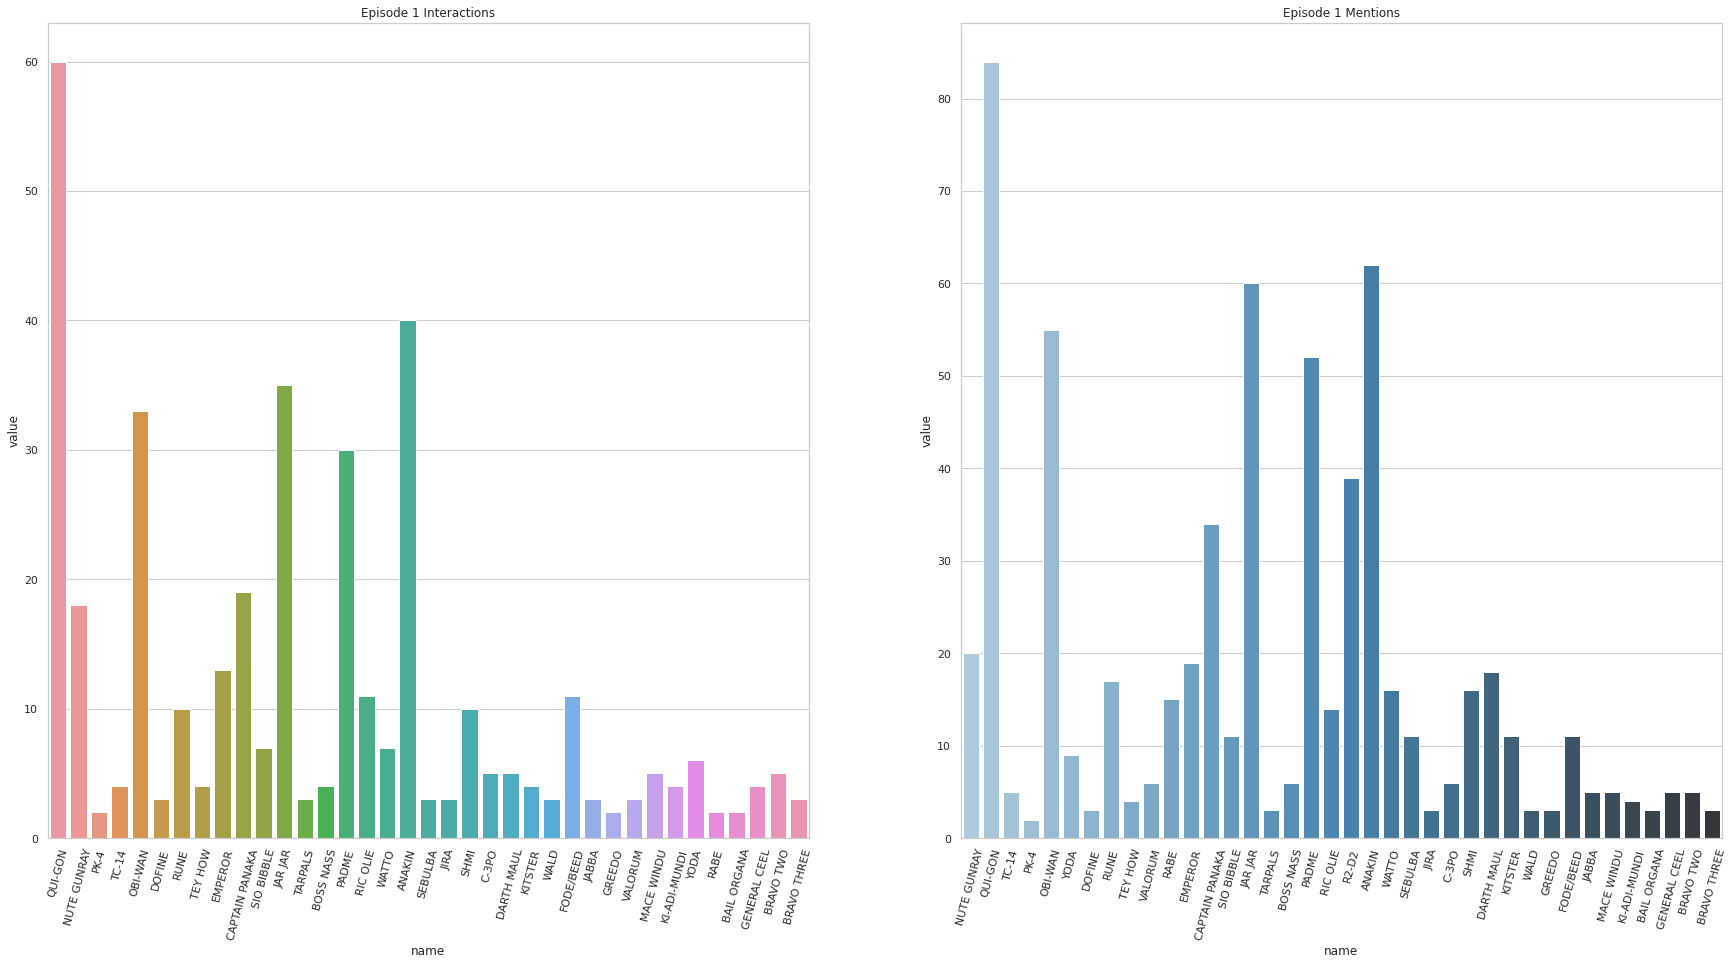

In [40]:
#Plots with both interactions and mentions
fig, axes = plt.subplots(ncols=2, figsize = (30, 15))
ax1 = sns.barplot(x='name', y='value', data=df_nodes, ax=axes[0])
ax2 = sns.barplot(x='name', y='value', data=mdf_nodes, ax=axes[1], palette="Blues_d")
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 75)
ax1.set(title='Episode 1 Interactions')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 75)
ax2.set(title='Episode 1 Mentions')